# Exploring Time Series

## Time Series Manipulation using Pandas

In [23]:
# Creating a date range with hourly frequency

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

In [24]:
date_rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [25]:
type(date_rng[0])

pandas._libs.tslibs.timestamps.Timestamp

Now let´s create an example dataframe with the timestamp data we just created

In [4]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

df.head()

,date,data
0,2018-01-01 00:00:00,73
1,2018-01-01 01:00:00,36
2,2018-01-01 02:00:00,59
3,2018-01-01 03:00:00,63
4,2018-01-01 04:00:00,66


If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on the timestamp.

In [5]:
#Convert the dataframe index to a datetime index 

df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()


,data
datetime,
2018-01-01 00:00:00,73
2018-01-01 01:00:00,36
2018-01-01 02:00:00,59
2018-01-01 03:00:00,63
2018-01-01 04:00:00,66


In [6]:
# Example on how to filter data with only day 2.

df[df.index.day == 2]

,data
datetime,
2018-01-02 00:00:00,25
2018-01-02 01:00:00,74
2018-01-02 02:00:00,50
2018-01-02 03:00:00,2
2018-01-02 04:00:00,43
2018-01-02 05:00:00,35
2018-01-02 06:00:00,90
2018-01-02 07:00:00,70
2018-01-02 08:00:00,1


In [7]:
# Filtering data between two dates

df['2018-01-04':'2018-01-06']

,data
datetime,
2018-01-04 00:00:00,85
2018-01-04 01:00:00,58
2018-01-04 02:00:00,20
2018-01-04 03:00:00,54
2018-01-04 04:00:00,17
...,...
2018-01-06 19:00:00,67
2018-01-06 20:00:00,42
2018-01-06 21:00:00,51


We could take the min, max, average, sum, etc., of the data at a daily frequency instead of an hourly frequency as per the example below where we compute the daily average of the data:

In [8]:
df.resample('D').mean()

,data
datetime,
2018-01-01,50.416667
2018-01-02,50.083333
2018-01-03,45.958333
2018-01-04,48.750000
2018-01-05,53.083333
2018-01-06,53.125000
2018-01-07,56.166667
2018-01-08,60.000000


In [9]:
# Example on how to get the sum of the last three values.

df['rolling_sum'] = df.rolling(4).sum()
df.head(10)

,data,rolling_sum
datetime,,
2018-01-01 00:00:00,73,NaN
2018-01-01 01:00:00,36,NaN
2018-01-01 02:00:00,59,NaN
2018-01-01 03:00:00,63,231.0
2018-01-01 04:00:00,66,224.0
2018-01-01 05:00:00,41,229.0
2018-01-01 06:00:00,98,268.0
2018-01-01 07:00:00,4,209.0
2018-01-01 08:00:00,73,216.0


It only starts having valid values when there are three periods over which to look back.

The following is a good chance to see how we can do forward or backfilling of data when working with missing data values.

In [29]:
df['rolling_mean'] = df['data'].rolling(4).mean()
df.head(10)

,data,rolling_sum,rolling_sum_backfilled,rolling_mean
datetime,,,,
2018-01-01 00:00:00,73,NaN,231.0,NaN
2018-01-01 01:00:00,36,NaN,231.0,NaN
2018-01-01 02:00:00,59,NaN,231.0,NaN
2018-01-01 03:00:00,63,231.0,231.0,57.75
2018-01-01 04:00:00,66,224.0,224.0,56.00
2018-01-01 05:00:00,41,229.0,229.0,57.25
2018-01-01 06:00:00,98,268.0,268.0,67.00
2018-01-01 07:00:00,4,209.0,209.0,52.25
2018-01-01 08:00:00,73,216.0,216.0,54.00


In [31]:
df.columns

Index(['data', 'rolling_sum', 'rolling_sum_backfilled', 'rolling_mean'], dtype='object')

In [33]:
df.values[:,3]

array([  nan,   nan,   nan, 57.75, 56.  , 57.25, 67.  , 52.25, 54.  ,
       54.75, 48.  , 50.25, 37.  , 41.5 , 36.5 , 46.75, 57.5 , 60.75,
       54.25, 53.  , 56.25, 45.25, 45.75, 42.5 , 29.75, 40.5 , 46.25,
       37.75, 42.25, 32.5 , 42.5 , 59.5 , 49.  , 65.  , 67.  , 70.25,
       94.5 , 91.  , 69.75, 70.5 , 53.  , 38.5 , 35.5 , 28.  , 37.  ,
       31.5 , 36.75, 34.5 , 28.5 , 27.25, 25.75, 33.25, 40.75, 54.25,
       55.  , 56.25, 53.75, 63.  , 77.25, 67.  , 73.75, 65.  , 52.5 ,
       53.  , 40.25, 26.75, 25.75, 22.25, 36.5 , 40.  , 40.25, 44.  ,
       42.  , 52.5 , 51.75, 54.25, 37.25, 39.5 , 45.75, 46.25, 57.  ,
       45.5 , 38.5 , 40.25, 38.  , 40.  , 41.5 , 48.25, 52.75, 61.25,
       62.75, 60.5 , 52.  , 47.25, 59.75, 43.  , 36.5 , 42.25, 37.5 ,
       41.25, 51.25, 40.5 , 43.5 , 37.75, 39.5 , 52.75, 52.  , 63.75,
       73.5 , 71.75, 62.  , 66.25, 59.  , 48.25, 59.25, 46.25, 52.25,
       60.75, 65.  , 63.25, 47.75, 47.25, 48.25, 48.5 , 66.  , 53.75,
       47.25, 52.  ,

In [36]:
df['data']

datetime
2018-01-01 00:00:00    73
2018-01-01 01:00:00    36
2018-01-01 02:00:00    59
2018-01-01 03:00:00    63
2018-01-01 04:00:00    66
                       ..
2018-01-07 20:00:00    42
2018-01-07 21:00:00    30
2018-01-07 22:00:00    85
2018-01-07 23:00:00    89
2018-01-08 00:00:00    60
Name: data, Length: 169, dtype: int64

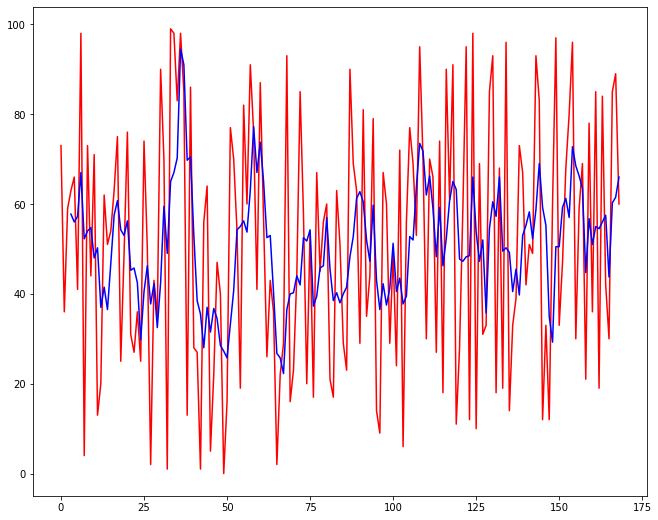

In [40]:
df['rolling_mean'] = df['data'].rolling(4).mean()

plt.plot(df['data'].values, 'r')
plt.plot(df.values[:,3], 'b')
plt.show()

In [41]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_backfilled,rolling_mean
datetime,,,,
2018-01-01 00:00:00,73,NaN,231.0,NaN
2018-01-01 01:00:00,36,NaN,231.0,NaN
2018-01-01 02:00:00,59,NaN,231.0,NaN
2018-01-01 03:00:00,63,231.0,231.0,57.75
2018-01-01 04:00:00,66,224.0,224.0,56.00


It’s often useful to be able to fill your missing data with realistic values such as the average of a time period, but always remember that if you are working with a time series problem and want your data to be realistic, you should not do a backfill of your data.

When working with time series data, you may come across time values that are in Unix time. Unix time, also called Epoch time is the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970.

**How to convert epoch time to real time?**


In [11]:
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

Timestamp('2018-06-17 21:57:35')

In [12]:
# Now, let's convert it to Pacific time

real_t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2018-06-17 14:57:35-0700', tz='US/Pacific')

## Use case:

In the following example we will only take in data from a uni-variate time series. That means we are only considering the relationship between the y-axis value the x-axis time points. We’re not considering outside factors that may be effecting the time series.

A common mistake beginners make is they immediately start to apply ARIMA forecasting models to data that has many outside factors.

In [13]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/electric_production.csv', index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3335
1939-02-01,3.3590
1939-03-01,3.4353
1939-04-01,3.4607
1939-05-01,3.4607


In [14]:
data.tail()

,IPG2211A2N
DATE,
2022-02-01,114.3064
2022-03-01,102.7846
2022-04-01,91.4573
2022-05-01,95.5598
2022-06-01,104.3661


Our index is actually just a list of strings that look like a date so we need to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values.

In [15]:
data.index = pd.to_datetime(data.index)

Let's also rename our IPG2211A2N column with a more friendly name.

In [16]:
data.columns = ['Energy Production']

In [17]:
pip install chart_studio cufflinks statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ebcc4c418739203ca4679316ad601e6e1d6ee823f399cf7f411b3d7550883152
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [18]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

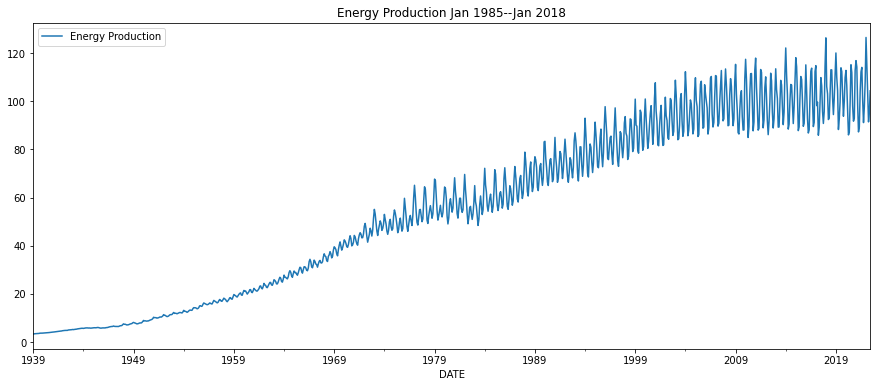

In [19]:
data.plot(title="Energy Production Jan 1985--Jan 2018", figsize=(15,6))

It looks like the trend in these earlier days is slightly increasing at a higher rate than just linear. Experimenting with additive versus multiplicative methods are made easy in just a few lines of code with statsmodels:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



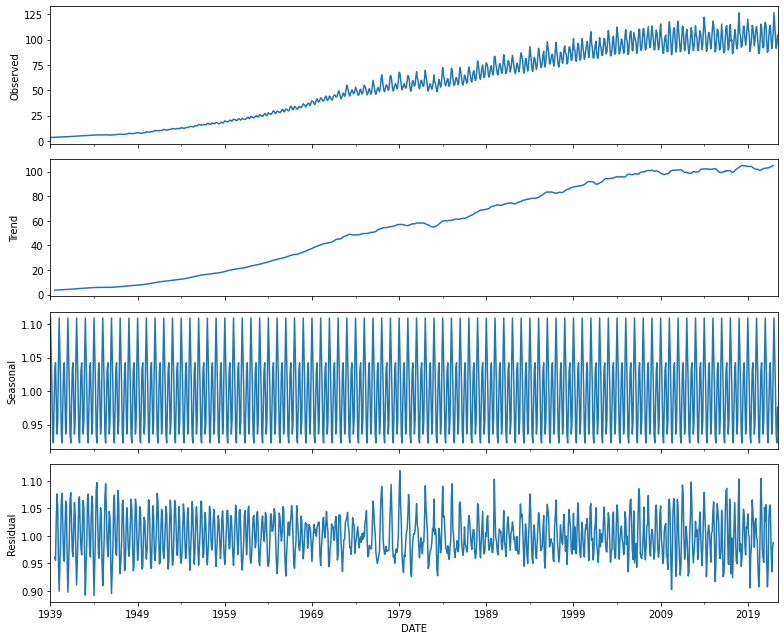

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative')
fig = decomposition.plot()
plt.show()


We can clearly see the seasonal component of the data, and we can also see the separated upward trend of the data. It makes sense to use a Seasonal ARIMA model. In order to do this we will need to choose p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component.

In [21]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 9.6 MB/s 
     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


The pyramid-arima library for Python allows us to quickly perform a grid search and even creates a model object that you can fit to the training data.

This library contains an auto_arima function that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value.

In [42]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4023.136, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4583.420, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4382.760, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4129.116, Time=1.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4340.994, Time=1.29 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4020.582, Time=3.72 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4228.529, Time=1.65 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3982.381, Time=5.02 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4086.153, Time=3.44 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3969.042, Time=10.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=4009.967, Time=9.31 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4056.170, Time=10.44 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=4113.543, Time=10.62 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3970.985, Time=15.07 sec
 ARIMA(1,1,2)(2

In [43]:
# Train test ssplit

train = data.loc['1985-01-01':'2017-12-01']
test = data.loc['2018-01-01':]

In [44]:
# Train the model

stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

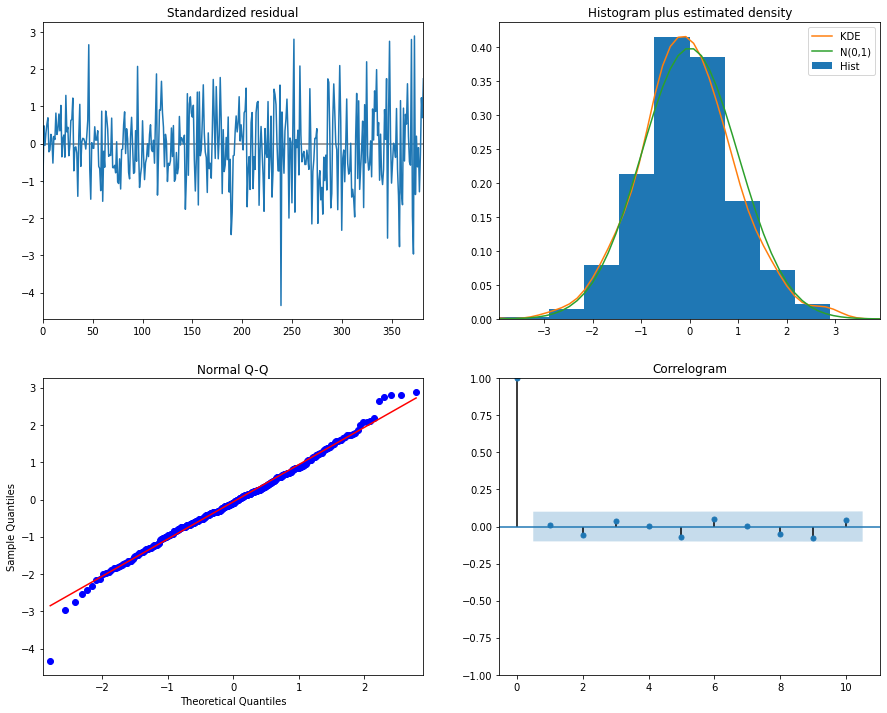

In [45]:
stepwise_model.fit(train).plot_diagnostics(figsize=(15, 12))
plt.show()

This is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the top right plot, we see that the orange KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

Now that the model has been fitted to the training data, we can forecast into the future. Recall that our test data set is from 2018–01–01 all the way until 2022-06-01, so we have 54 periods. That is the value we will use for our .predict() method call:

In [46]:
future_forecast = stepwise_model.predict(n_periods=54)

Let's create a dataframe that contains our future forecast and then concatenating that with the original data.

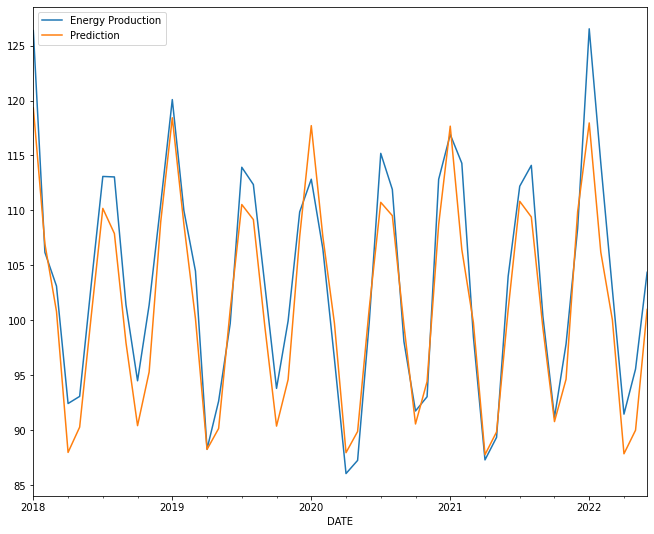

In [47]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


Now let's get a larger picture of the context of our prediction in the test set.

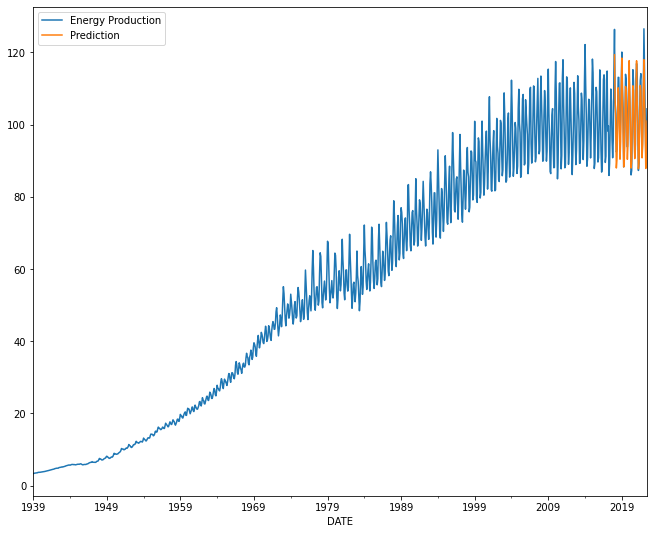

In [48]:
pd.concat([data,future_forecast],axis=1).plot()

Now it's your turn to refit our model to our entire data set and then forecast into the real future!

Source: 

https://towardsdatascience.com/how-to-forecast-time-series-with-multiple-seasonalities-23c77152347e

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://github.com/WillKoehrsen/Data-Analysis/tree/master/additive_models

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3